/work03/am/2021.ECS.HEAVY.RAIN/11.00.AMEDAS/31.00.HISTOGRAM.DAILY.PRECIP/26.00.95.PERCENTILE

In [1]:
pwd

'/work03/am/2021.ECS.HEAVY.RAIN/11.00.AMEDAS/31.00.HISTOGRAM.DAILY.PRECIP/26.00.95.PERCENTILE'

In [45]:
#
# TEST SORT
#
import numpy as np

a1 = [1, 2, 9, 3, 2, np.nan, np.nan] # 例題 a1
a2 = [1, np.nan, 2, 9, 3, 2, np.nan] # 例題 a2

# 単純なSortの実行
ng1 = sorted(a1, key=lambda x: x)
ng2 = sorted(a2, key=lambda x: x)

# NaN値を置き換えてのSortの実行
ok1 = sorted(a1, key=lambda x: np.inf if np.isnan(x) else x)
ok2 = sorted(a2, key=lambda x: np.inf if np.isnan(x) else x)

print("NG:", ng1, ng2) # 例題 a2 を正しくソートできない
print("OK:", ok1, ok2) # 両例題とも正しくソートできる

NG: [1, 2, 2, 3, 9, nan, nan] [1, nan, 2, 2, 3, 9, nan]
OK: [1, 2, 2, 3, 9, nan, nan] [1, 2, 2, 3, 9, nan, nan]


In [3]:
#
# MAX, 95 PERCENTILE
#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import itertools
#matplotlib.use('Agg')
import os
%matplotlib inline

DSET="AMeDAS DAILY PRECIPITATION"

YS,YE=1982,2021

BIPEN="07BP01"
INDIR="/work01/DATA/AMeDAS/HISTO_W.KYUSHU_1DY.PRECIP/"+BIPEN+"/"
PREFIX="AMeDAS_HISTO_W.KYUSHU_"


NY=YE-YS+1
YYYY = []
P095  = []
PMIN = []
PMAX = []
NSIZE= []
NVALID=[]

import pandas as pd

for i in range(NY):

    YYYY.append(YS+i)
   
    INFLE=PREFIX+BIPEN+"_"+str(YYYY[i])+".csv"
    
    df = pd.read_csv(INDIR+INFLE, header=0) #dtype='float',
    df.replace([-99.0], np.nan, inplace=True)
    # df.replace([  0.0], np.nan, inplace=True)
    
# https://www.python.ambitious-engineer.com/archives/2106

    P = np.array(df['R'])
    PSORT = sorted(P, key=lambda x: np.inf if np.isnan(x) else x)

    P_NOT_ZERO = [x for x in PSORT if np.isnan(x) == False]

    NSIZE.append(len(P_NOT_ZERO))

    # print(P_NOT_ZERO)
    ID95=int(NSIZE[i]*0.95)
    #print(NSIZE[i])
    #print(ID95)
    P095.append(P_NOT_ZERO[ID95])
    PMAX.append(P_NOT_ZERO[NSIZE[i]-1])

    # print(str(YYYY[i])+" "+"NSIZE,PMAX="+str(NSIZE[i])+" "+str(PMAX[i])+" ID95,P095="+str(ID95)+" "+str(P095[i]))
    



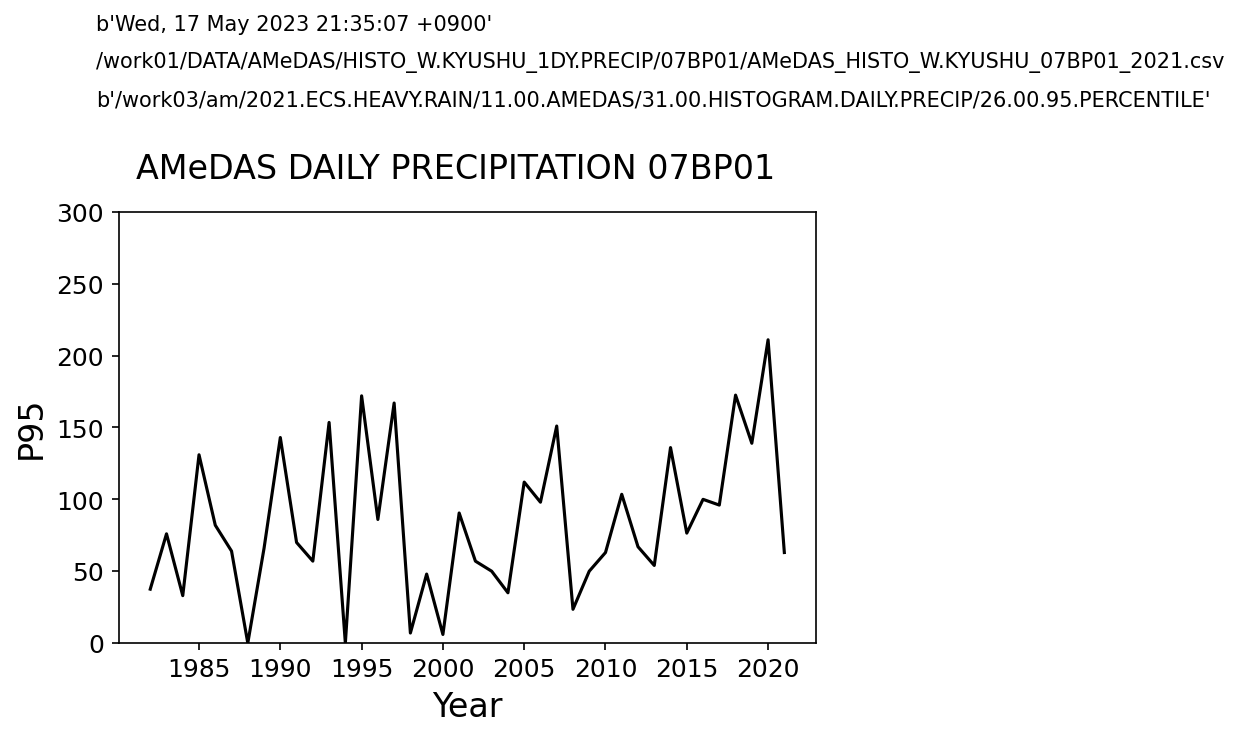

In [4]:
# 95 PRECENTILE
OFLE="95.PERCENTILE_"+PREFIX+BIPEN+"_"+str(YS)+"-"+str(YE)+".png"

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 5),dpi=150, facecolor="white")

fig.subplots_adjust(wspace=0.6, hspace=0.6, top=0.7)

ax = fig.add_subplot(1, 1, 1)
ax.plot(YYYY, P095,color='black')
 
ax.set_xlabel("Year")
ax.set_ylabel("P95")

ax.set_ylim(0,300)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

x,y=0.5,0.78
plt.suptitle(DSET+" "+BIPEN,fontsize=16,x=x,y=y)

import subprocess
res = subprocess.check_output('date -R',shell=True).strip()
x,y = 0.1, 0.95
fig.text(x,y,res.strip(), fontsize=10,ha='left', va='center')

x,y = 0.1, 0.9
fig.text(x,y,INDIR+INFLE, fontsize=10,ha='left', va='center')

res = subprocess.check_output('pwd',shell=True).strip()
x,y = 0.1, 0.85
fig.text(x,y,res.strip(), fontsize=10,ha='left', va='center')

plt.savefig(OFLE, dpi=150, bbox_inches="tight", pad_inches=0.1)

fig.show()

t( 0.975 ,  38 ) =  2.024394164575136


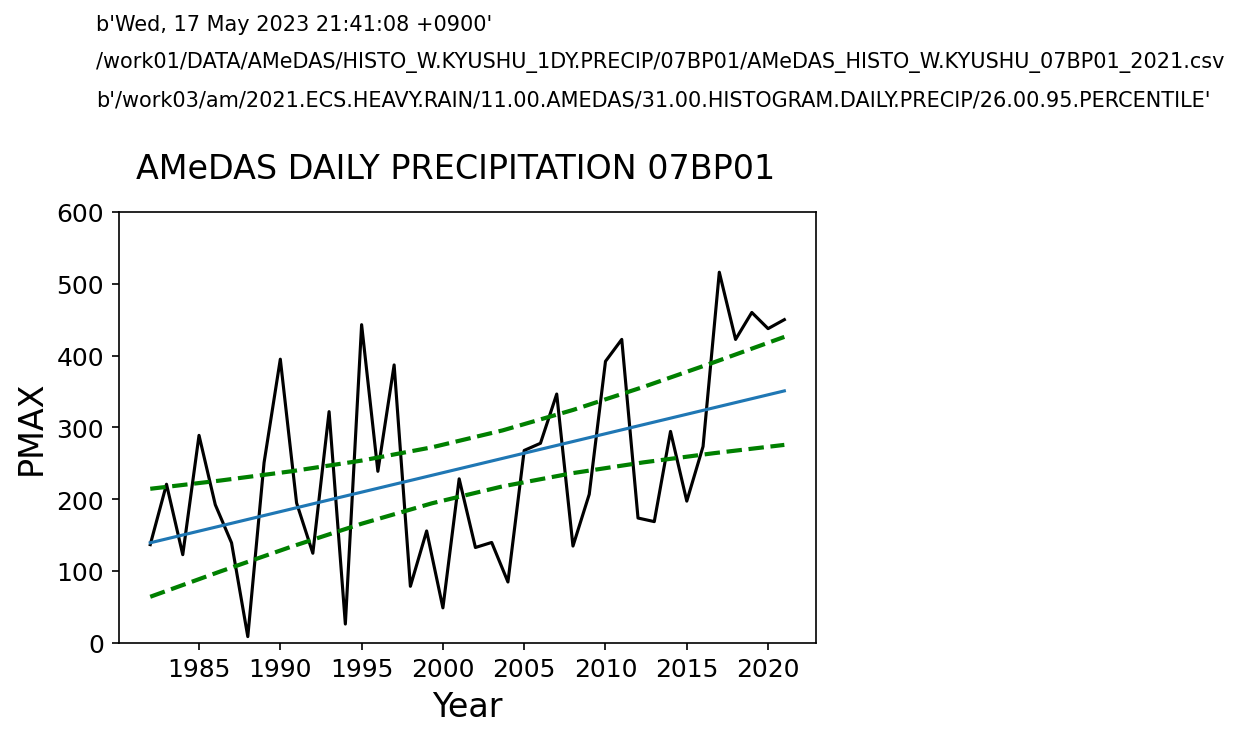

In [13]:
# MAX

OFLE="PMAX_"+PREFIX+BIPEN+"_"+str(YS)+"-"+str(YE)+".png"

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 5),dpi=150, facecolor="white")

#fig, ax = plt.subplots() 
fig.subplots_adjust(wspace=0.6, hspace=0.6, top=0.7)

ax = fig.add_subplot(1, 1, 1)
ax.plot(YYYY, PMAX,color='black')

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

x = np.array(YYYY).reshape(-1,1)
# https://aiacademy.jp/media/?p=2126  # ValueError

y=PMAX

lin = LinearRegression()
lin.fit(X, PMAX)
y_linear = lin.coef_ * X + lin.intercept_
ax.plot(X, y_linear, label="Linear")


b = lin.coef_[0]             # slr.coef_ が [0.812] なのでスカラーにする
a = lin.intercept_

p2 = 0.95                  # 信頼確率　95% （信頼区間の計算に用いる）
# ======================== 基本統計量の計算
n = len(x)                 # 組数：n= 14
xmin = x.min()             # x の最小値
xmax = x.max()             # x の最大値
mx = x.mean()              # 平均：mx=163.4
sdx = x.std()              # x の標準偏差

# ======================== ｔ分布の値とscipyライブラリ
from scipy import stats    # t.ppt(α,自由度) を使うために必要
p = (1+p2)/2               # p2=0.95は「入力データ」で指定、片側確率　(1+0.95)/2=0.975　
t = stats.t.ppf(p, n-2)    # t(0.975,12)=2.179
print('t(',p, ', ', n-2, ') = ',t) 

# ================= 誤差の統計量
yr = a + b*x               # 各xに対応する回帰直線のｙの値（xが列ベクトルなので）
yr = yr[:,0]               # 列ベクトルを行ベクトルに変換
ye = y - yr                # 誤差
see = np.sum(ye**2)        # 誤差平方和    248.308
sde  = np.sqrt(see/(n-2))  # 誤差標準偏差    4.548

# ================= x,y の付けなおし
u = np.linspace(xmin, xmax, 10) # 新規に等間隔のxの値
v = a + b*u                # uに対応する回帰直線の値

# ================= 信頼区間の計算 
ci = t*sde/np.sqrt(n)*np.sqrt(1+((u-mx)/sdx)**2)  # 信頼区間幅
upper = v + np.abs(ci)
lower = v - np.abs(ci)

ax.plot(u, upper, 'g--', linewidth=2)   # 上側信頼範囲
ax.plot(u, lower, 'g--', linewidth=2)   # 下側信頼範囲


ax.set_xlabel("Year")
ax.set_ylabel("PMAX")

"""
print(YYYY)
print(PMAX)
"""

ax.set_ylim(0,600)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

x,y=0.5,0.78
plt.suptitle(DSET+" "+BIPEN,fontsize=16,x=x,y=y)

import subprocess
res = subprocess.check_output('date -R',shell=True).strip()
x,y = 0.1, 0.95
fig.text(x,y,res.strip(), fontsize=10,ha='left', va='center')

x,y = 0.1, 0.9
fig.text(x,y,INDIR+INFLE, fontsize=10,ha='left', va='center')

res = subprocess.check_output('pwd',shell=True).strip()
x,y = 0.1, 0.85
fig.text(x,y,res.strip(), fontsize=10,ha='left', va='center')

plt.savefig(OFLE, dpi=150, bbox_inches="tight", pad_inches=0.1)

fig.show()



#plt.show()



# 予備

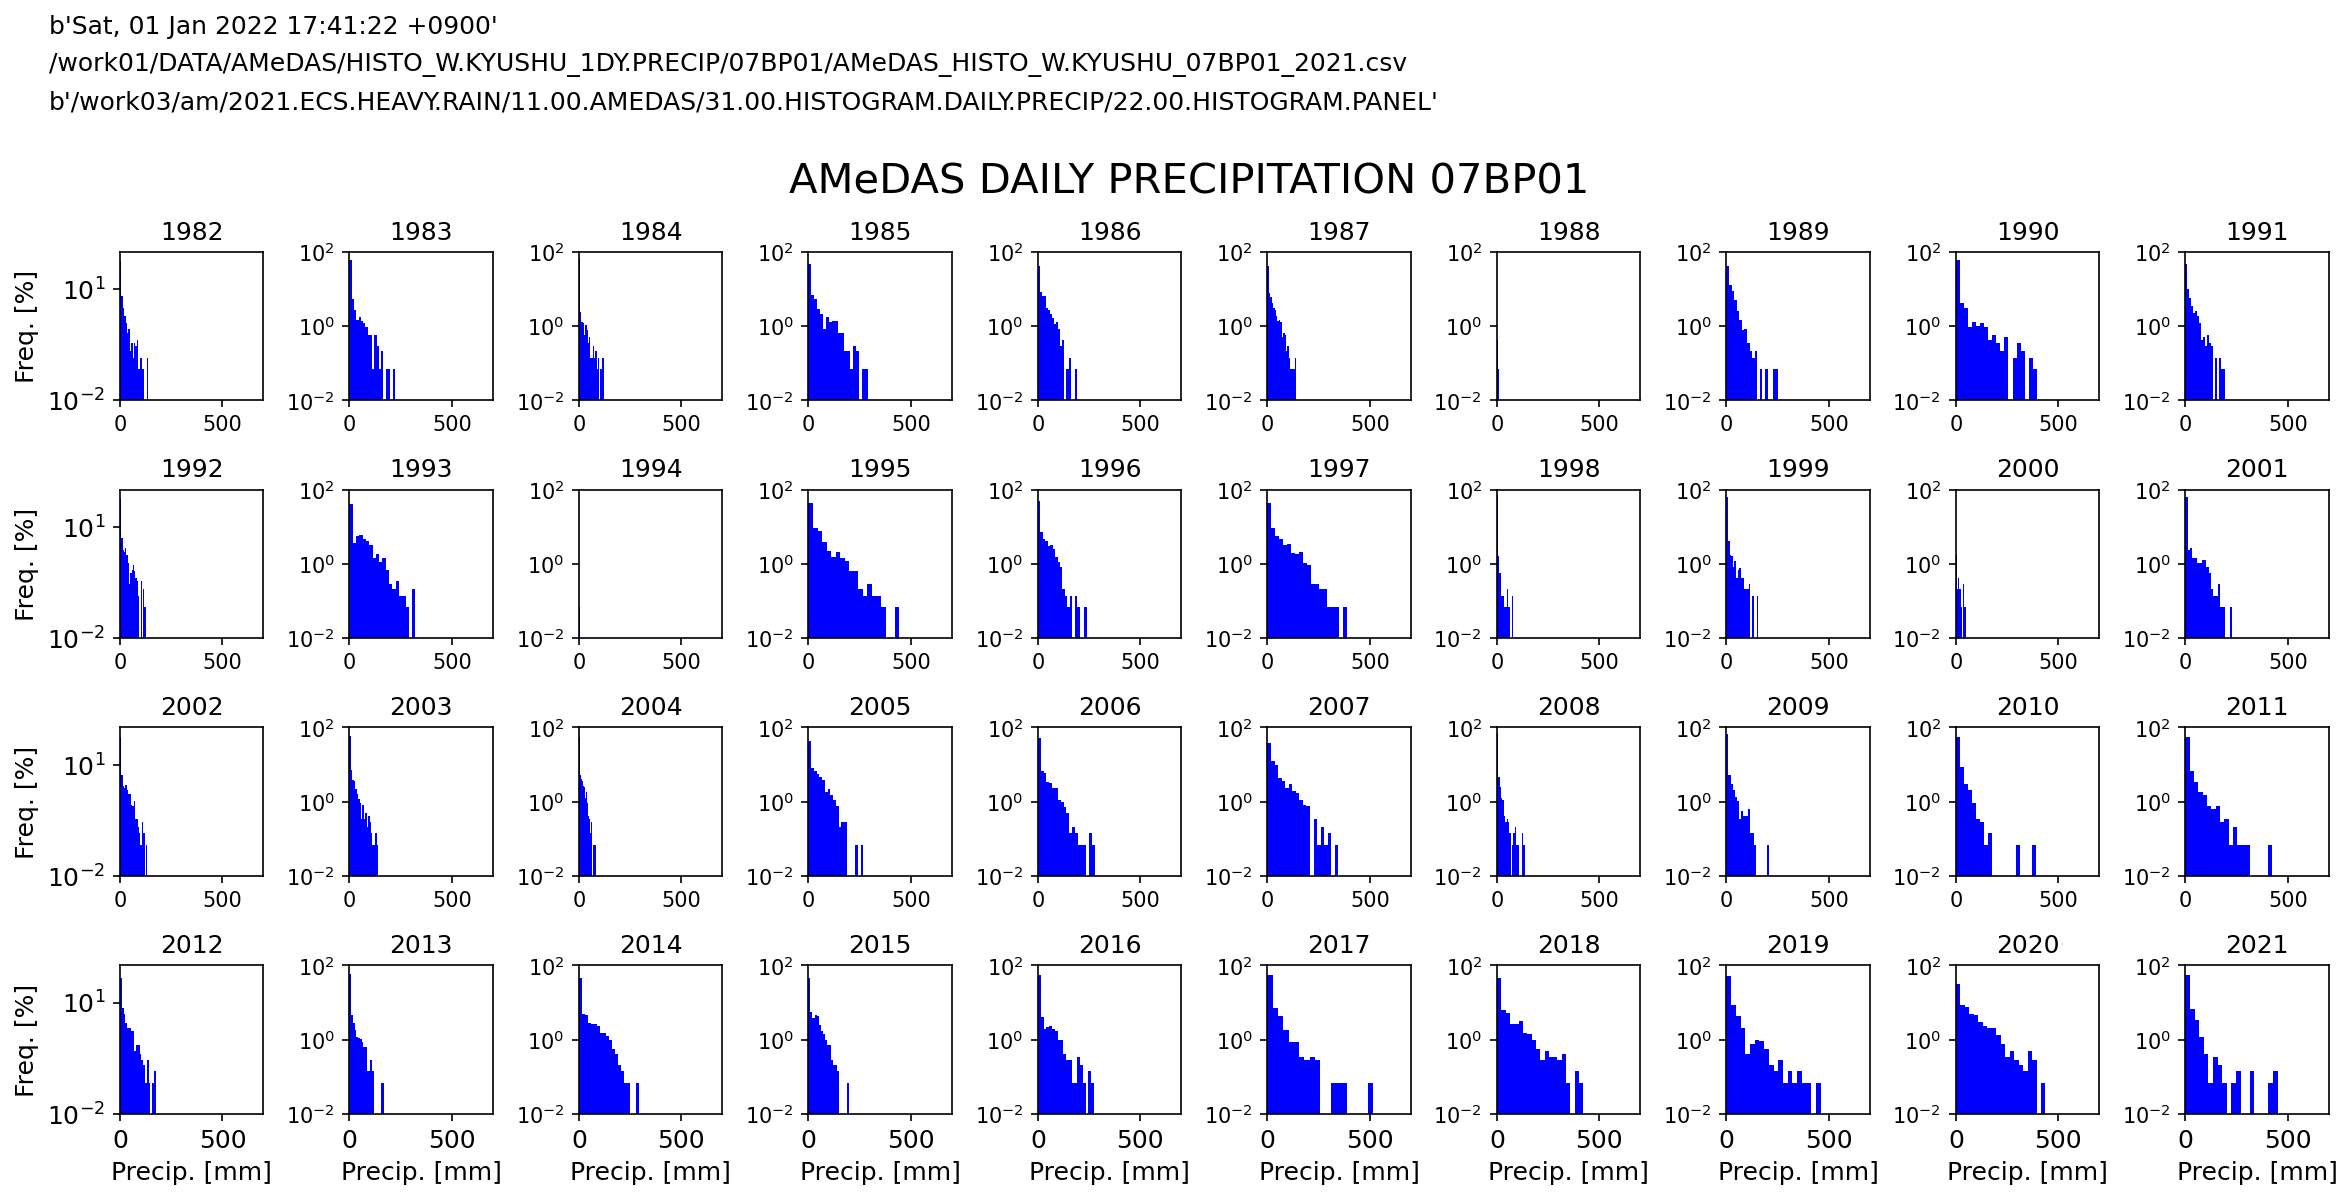

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import itertools
#matplotlib.use('Agg')
import os
%matplotlib inline

DSET="AMeDAS DAILY PRECIPITATION"

YS,YE=1982,2021

BIPEN="07BP01"
INDIR="/work01/DATA/AMeDAS/HISTO_W.KYUSHU_1DY.PRECIP/"+BIPEN+"/"
PREFIX="AMeDAS_HISTO_W.KYUSHU_"

OFLE=PREFIX+BIPEN+"_"+str(YS)+"-"+str(YE)+".png"


NPANEL=YE-YS+1
ax = list(itertools.repeat(0, NPANEL))
im = list(itertools.repeat(0, NPANEL))
#cb = list(itertools.repeat(0, NVAR))

fig = plt.figure(figsize=(19, 10),dpi=150, facecolor="white")

fig.subplots_adjust(wspace=0.6, hspace=0.6, top=0.7)

for i in range(NPANEL):

    YYYY=YS+i
    
    ax[i] = fig.add_subplot(4, 10, i+1) #, projection=proj)

    INFLE=PREFIX+BIPEN+"_"+str(YYYY)+".csv"
    
    TITLE=str(YYYY)

    df = pd.read_csv(INDIR+INFLE, header=0) #dtype='float',
    df.replace([-99.0], np.nan, inplace=True)

# https://www.python.ambitious-engineer.com/archives/2106

    data = np.array(df['R'])

    weights = np.ones(len(data))/float(len(data))*100.

    ax[i].hist(data,bins=20,color="blue",weights=weights,label=str(YYYY)+" "+BIPEN)

    plt.yscale("log")


    # グラフの装飾
    ax[i].set_xlim(0, 700)                 # (1) x軸の表示範囲
    ax[i].set_ylim(1E-2, 100)                 # (2) y軸の表示範囲
    ax[i].set_title(TITLE, fontsize=12)  # (3) タイトル
    #plt.grid(True)                            # (6) 目盛線の表示

    if i>=30:
        ax[i].tick_params(axis='x', labelsize=12)
        ax[i].set_xlabel("Precip. [mm]", fontsize=12)            # (4) x軸ラベル
        
    if i%10==0:
        ax[i].set_ylabel("Freq. [%]", fontsize=12)      # (5) y軸ラベル
        ax[i].tick_params(axis='y', labelsize=12)

x,y=0.5,0.76
plt.suptitle(DSET+" "+BIPEN,fontsize=20,x=x,y=y)

import subprocess
res = subprocess.check_output('date -R',shell=True).strip()
x,y = 0.1, 0.85
fig.text(x,y,res.strip(), fontsize=12,ha='left', va='center')

x,y = 0.1, 0.825
fig.text(x,y,INDIR+INFLE, fontsize=12,ha='left', va='center')

res = subprocess.check_output('pwd',shell=True).strip()
x,y = 0.1, 0.8
fig.text(x,y,res.strip(), fontsize=12,ha='left', va='center')

fig.savefig(OFLE, dpi=150, bbox_inches="tight", pad_inches=0.1)
fig.show()